# Text classification: Understanding the Customer's Feedback

---

Text classification is one of the important tasks of text mining

![alt text](http://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1535125878/NLTK3_zwbdgg.png)

In this notebook, I will perform Sentiment Analysis on IMDB movies reviews. Sentiment Analysis is the art of extracting people's opinion from digital text. I will use a regression model from Scikit-Learn able to predict the sentiment given a movie review.

We will use [the IMDB movie review dataset](http://ai.stanford.edu/~amaas/data/sentiment/), which consists of 50,000 movies review (50% are positive, 50% are negative).

The libraries needed in this notebook are:
* [Numpy](http://www.numpy.org/) — a package for scientific computing.
* [Pandas](https://pandas.pydata.org/) — a library providing high-performance, easy-to-use data structures and data analysis tools for the Python
* [Matplotlib](https://matplotlib.org/) — a package for plotting & visualizations.
* [scikit-learn](http://scikit-learn.org/stable/index.html) — a tool for data mining and data analysis.
* [NLTK](http://www.nltk.org/) — a platform to work with natural language.

##Loading the data

### Importing the libraries and necessary dictionaries

In [109]:
import numpy as np
import pandas as pd
import nltk
import matplotlib.pyplot as plt
from tensorflow import keras

# download Punkt Sentence Tokenizer
nltk.download('punkt')
# download stopwords
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

### Loading the dataset in our directory

In [110]:
# download IMDB dataset
!wget "https://raw.githubusercontent.com/javaidnabi31/Word-Embeddding-Sentiment-Classification/master/movie_data.csv" -O "movie_data.csv"

# list files in current directory
!ls -lah

--2023-11-16 01:45:57--  https://raw.githubusercontent.com/javaidnabi31/Word-Embeddding-Sentiment-Classification/master/movie_data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 65862309 (63M) [text/plain]
Saving to: ‘movie_data.csv’

movie_data.csv      100%[===================>]  62.81M   208MB/s    in 0.3s    

2023-11-16 01:46:00 (208 MB/s) - ‘movie_data.csv’ saved [65862309/65862309]

total 63M
drwxr-xr-x 1 root root 4.0K Nov 16 00:24 .
drwxr-xr-x 1 root root 4.0K Nov 16 00:22 ..
drwxr-xr-x 4 root root 4.0K Nov 14 14:22 .config
-rw-r--r-- 1 root root  63M Nov 16 01:46 movie_data.csv
drwxr-xr-x 1 root root 4.0K Nov 14 14:23 sample_data


###Reading the dataset file and getting info on it using pandas to read the csv file and display the first 5 rows

In [111]:
# path to IMDB dataseet
path = 'movie_data.csv'

# read file (dataset) into our program using pandas
data = pd.read_csv(path)

# display first 5 rows
data.head()

,review,sentiment
0,I went and saw this movie last night after bei...,1
1,Actor turned director Bill Paxton follows up h...,1
2,As a recreational golfer with some knowledge o...,1
3,"I saw this film in a sneak preview, and it is ...",1
4,Bill Paxton has taken the true story of the 19...,1


Getting info on our dataset

In [112]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 781.4+ KB


A balanced dataset in sentiment analysis is a dataset which holds an equal amount of positive sentiment data and negative sentiment data, meaning 50% of the data is positive and 50% is negative

Check if dataset is balanced (number of positive sentiment = number of negative sentiment) by plotting the different classes

(array([25000.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0., 25000.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

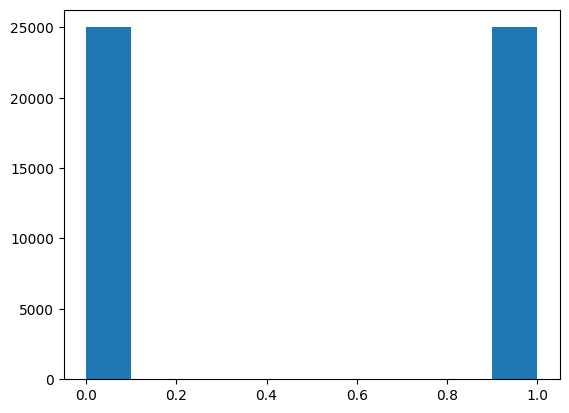

In [113]:
plt.hist([data['sentiment']])

## Text cleaning

In [114]:
print(data.review[10])

I loved this movie from beginning to end.I am a musician and i let drugs get in the way of my some of the things i used to love(skateboarding,drawing) but my friends were always there for me.Music was like my rehab,life support,and my drug.It changed my life.I can totally relate to this movie and i wish there was more i could say.This movie left me speechless to be honest.I just saw it on the Ifc channel.I usually hate having satellite but this was a perk of having satellite.The ifc channel shows some really great movies and without it I never would have found this movie.Im not a big fan of the international films because i find that a lot of the don't do a very good job on translating lines.I mean the obvious language barrier leaves you to just believe thats what they are saying but its not that big of a deal i guess.I almost never got to see this AMAZING movie.Good thing i stayed up for it instead of going to bed..well earlier than usual.lol.I hope you all enjoy the hell of this movi

Let's define a function that would clean each movie review (sentence)

In [115]:
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer

english_stopwords = stopwords.words('english')
stemmer = PorterStemmer()

# define cleaning function
def clean_review(text):
  text = word_tokenize(text)
  text = [t for t in text if not t in english_stopwords]
  text = [stemmer.stem(t) for t in text]
  text = ' '.join(text)
  return text

In [116]:
data.loc[1,'clean_review'] = clean_review(data.loc[1,'review'])

And now clean the entire dataset reviews

In [117]:
# apply to all dataset
data['clean_review'] = data['review'].apply(clean_review)
data.head()

,review,sentiment,clean_review
0,I went and saw this movie last night after bei...,1,i went saw movi last night coax friend mine . ...
1,Actor turned director Bill Paxton follows up h...,1,actor turn director bill paxton follow promis ...
2,As a recreational golfer with some knowledge o...,1,"as recreat golfer knowledg sport 's histori , ..."
3,"I saw this film in a sneak preview, and it is ...",1,"i saw film sneak preview , delight . the cinem..."
4,Bill Paxton has taken the true story of the 19...,1,bill paxton taken true stori 1913 us golf open...


## Split dataset for training and testing
splitting data into two subsets: a 50% subset will be used for training the model for prediction and the remaining 50% will be used for evaluating or testing its performance. The random state ensures reproducibility of the results.

Split your data to get x_train, x_test, y_train and y_test.

In [118]:
from sklearn.model_selection import train_test_split

X = data['clean_review']
y = data['sentiment']

# Split data into 50% training & 50% test
# Use a random state of 42 for example to ensure having the same split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state = 42)

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(25000,) (25000,)
(25000,) (25000,)


## Feature extraction with Bag of Words


In this section, apply the Bag of Words method to learn the vocabulary of the text and with it transform your training input data.

In [119]:
from sklearn.feature_extraction.text import CountVectorizer

# define a CountVectorizer (with binary=True and max_features=10000)
vectorizer = CountVectorizer(binary=True, max_features=10000)

# learn the vocabulary of all tokens in our training dataset
vectorizer.fit(x_train)
vectorizer.fit(x_test)

# transform x_train to bag of words
x_train_bow = vectorizer.transform(x_train)
x_test_bow = vectorizer.transform(x_test)

print(x_train_bow.shape, y_train.shape)
print(x_test_bow.shape, y_test.shape)

(25000, 10000) (25000,)
(25000, 10000) (25000,)


## Classification

data is ready for classification. For this task use [LogisticRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

In [120]:
from sklearn.linear_model import LogisticRegression

# define the LogisticRegression classifier
model = LogisticRegression()

# train the classifier on the training data
model.fit(x_train_bow,y_train)

# get the mean accuracy on the training data
acc_train = model.score(x_train_bow,y_train)

print('Training Accuracy:', acc_train)

Training Accuracy: 0.9826


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Evaluating the performance of the model through its accuracy score

In [121]:
# Evaluate model with test data
model.score(x_test_bow,y_test)


0.86416

In [122]:
# define predict function
def predict(model,vectorizer,review):
  review = clean_review(review)
  review = vectorizer.transform([review])
  pred = model.predict(review)

  return pred

In [125]:
review = 'The movie was great!'
predict(model, vectorizer, review)

array([1])